In [2]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [3]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\mehrotra"
gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

In [23]:
file_gurobi = jldopen(string(gurobi_path, "\\gurobi_barrier_allOFF.jld2"), "r")
gurobi = file_gurobi["stats"]
close(file_gurobi)
file_gurobi2 = jldopen(string(gurobi_path, "\\gurobi_barrier_scalingON.jld2"), "r")
gurobi2 = file_gurobi2["stats"] # scaling ON
close(file_gurobi2)

file3 = jldopen(string(res_path, "\\mehrotra_ldl3_scaling.jld2"), "r") # check frontier 0.05
mehrotra3 = file3["stats"];
close(file3)
file4 = jldopen(string(res_path, "\\mehrotra_ldl4_scaling.jld2"), "r") # check frontier 0.05, new scaling
mehrotra4 = file4["stats"];
close(file3)
file5 = jldopen(string(res_path, "\\mehrotra_ldl5_scaling.jld2"), "r") # check frontier disabled
mehrotra5 = file5["stats"];
close(file5)
file6 = jldopen(string(res_path, "\\mehrotra_ldl6_scaling.jld2"), "r") 
mehrotra6 = file6["stats"];# check frontier 0.001
close(file6)
file7 = jldopen(string(res_path, "\\mehrotra_ldl7_scaling.jld2"), "r") 
mehrotra7 = file7["stats"]; # checkfr 0.001, init pts 9e-5, ρ0, δ0 = 1e7*sqrt(eps()), 1e-1
close(file7)
file8 = jldopen(string(res_path, "\\mehrotra_ldl8_scaling.jld2"), "r") 
mehrotra8 = file8["stats"]; # checkfr 0.001, init pts 9e-5, ρ0, δ0 = 1e5*sqrt(eps()), 1e-2
close(file8)

In [33]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(mehrotra8)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.463496,26,2.01324e-11,4.24342e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00329614,15,5.09282e-12,4.70436e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.00090313,8,4.71162e-12,1.66551e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0281019,26,1.29721e-10,1.87303e-7,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.070394,20,2.40759e-9,1.06672e-8,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.0735581,21,1.87432e-11,9.45102e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.351399,20,2.58812e-12,7.29596e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.0169301,16,2.76846e-10,1.46528e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.0036149,13,1.80967e-13,5.51684e-13,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [8]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(gurobi2)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.107142,23,4.10438e-14,2.43465e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.0020721,12,6.40588e-11,5.1707e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000782013,7,8.65244e-16,3.31477e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0449359,30,2.93555e-11,1.92089e-8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0365658,16,3.34745e-11,6.91125e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.036387,16,5.84665e-12,6.88852e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.0145879,16,2.96058e-13,9.17594e-11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.00766802,9,4.16176e-11,2.72975e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.0040822,22,4.59918e-15,6.10285e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,


In [29]:
stats = Dict(:gurobi => gurobi, :gurobi2 => gurobi2,
            :mehrotra3 => mehrotra3,
            :mehrotra7 => mehrotra7, :mehrotra8 => mehrotra8)

stats2 = Dict(:mehrotra7 => mehrotra7, :mehrotra8 => mehrotra8)

Dict{Symbol,DataFrame} with 2 entries:
  :mehrotra7 => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra8 => 87×30 DataFrame. Omitted printing of 23 columns…

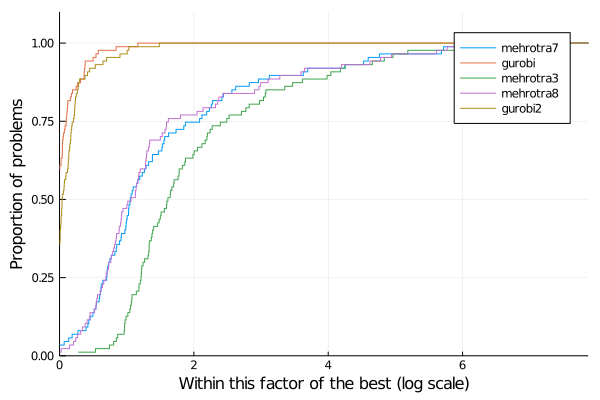

In [28]:
performance_profile(stats, df->df.elapsed_time)


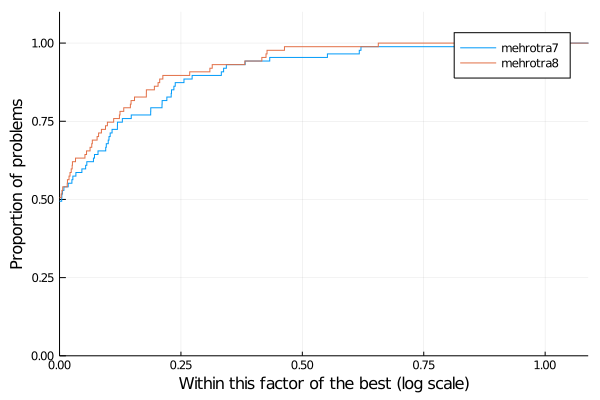

In [30]:
performance_profile(stats2, df->df.elapsed_time)